Using tutorial here: https://huggingface.co/docs/transformers/en/tasks/zero_shot_object_detection

In [2]:
from transformers import pipeline

checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

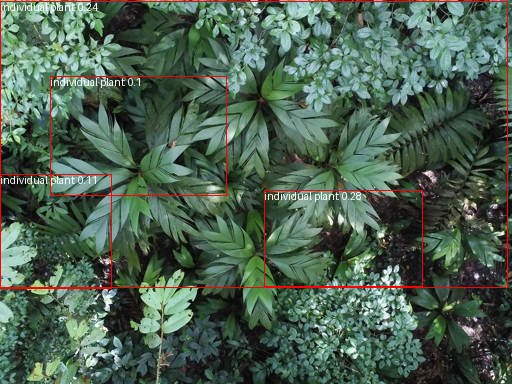

In [7]:
from PIL import Image, ImageDraw
import torch
import matplotlib.pyplot as plt
import os

directory_path = R"G:\.shortcut-targets-by-id\1BCCfXZq98f4rFOF8m0AweybL4qQakAUB\Summer Dive 2022\Monteverde Imagery - Stephanie\River\Dry Flight\100MEDIA"
image_basename = "P1480443.JPG"  # two red fruits
# image_basename = "P2120507.JPG"  # big bush with fruits
image_basename = "P0960390.JPG"  # ferns, no flowers
# image_basename = "P1090403.JPG"  # palm tree with cool fruits, no flowers
# image_basename = "P1580453.JPG"  # log with fungus
# image_basename = "P2330528.JPG"  # flowers on bush, and sky
# image_basename = "P0800374.JPG"  # vine with tiny yellow flowers

image_path = os.path.join(directory_path, image_basename)



with Image.open(image_path).convert("RGB") as image:
    aspect_ratio = image.width / image.height
    new_width = 512
    image = image.resize((new_width, int(new_width / aspect_ratio)))

    predictions = detector(
        image,
        candidate_labels=["individual plant"],
    )

    draw = ImageDraw.Draw(image)

    for prediction in predictions:
        box = prediction["box"]
        label = prediction["label"]
        score = prediction["score"]

        xmin, ymin, xmax, ymax = box.values()
        draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
        draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="white")

image